# # Random Forest = (Bootstraping + Aggregation) -> Bagging
## ideal size of feature subset ? -> square root of total no of features or close to he sq root/ log of total feature

## Aggregation => Take the mean at this stage

In [ ]:
# Pros =>    * Robust
#            * highly accurate than Decesion Tree
#            * overfitting is not a problem due to Average/mode
#            * Can be used in both Classification and Regression(Aggregation)
#            * you can also get relative feature info ( X = y' linked)
                                                      
# Cons =>    * so many Decesion Tree
#            * so many subSample
#            * slow prediction
#            * compution high
#            * hard to interpreat
                                                      

# Random Forest VS Decesion Tree

Random forest is better than DTs

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
from sklearn.tree import DecisionTreeClassifier
X = df.iloc[:, :-1]
y = df.iloc[:, -1:]

In [13]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
model.fit(X, y)
model.predict([[10, 4, 2, 6]])

C:\Users\KAMALU~1.AHM\AppData\Local\Temp/ipykernel_8156/2709007807.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X, y)


array(['setosa'], dtype=object)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

predictions = model.predict(X_test)
predictions

array(['setosa', 'virginica', 'versicolor', 'setosa', 'versicolor',
       'setosa', 'setosa', 'virginica', 'virginica', 'versicolor',
       'setosa', 'versicolor', 'setosa', 'virginica', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'versicolor', 'virginica', 'setosa',
       'versicolor', 'setosa', 'setosa'], dtype=object)

In [17]:
# Accuracy test
score = model.score(X_test, y_test)
print("The accuracy score is:", score)

The accuracy score is: 1.0


In [19]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, predictions))

Accuracy: 1.0


In [20]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, predictions)
cm

array([[16,  0,  0],
       [ 0,  8,  0],
       [ 0,  0,  6]], dtype=int64)

Text(0.5, 1.0, 'Accuracy Score: 1.0')

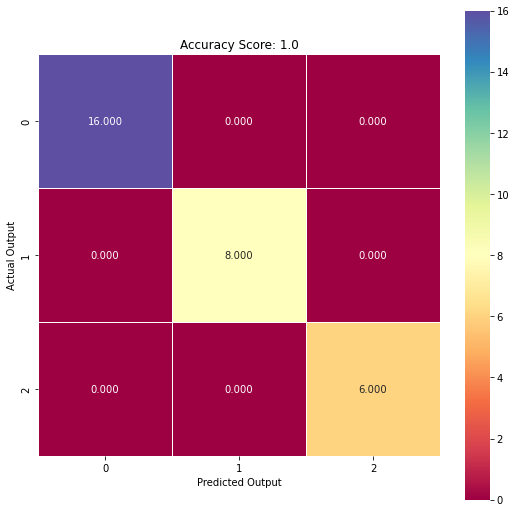

In [21]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Spectral');
plt.ylabel('Actual Output');
plt.xlabel('Predicted Output');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title)